# Analysis of the resulted models, results visualization

In [2]:
from time import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
from matplotlib import pyplot as plt

sys.path.append('../benchmark/benchmark_models')
sys.path.append('../benchmark')
sys.path.append('../src/data')

from GLocal_K import *

torch.manual_seed(1284)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/home/dom_iva/miniconda3/envs/ml_courses/lib/python3.11/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


## Part 1. Evaluating the models

In [15]:
data_path = '../data/raw/ml-100k/'
evals = {}

In [16]:
# Evaluating developed solutions

# models_weights = []
# models_names = []
# for weight, name in zip(models_weights, models_names):
#     evals[name] = evaluate(data_path=data_path, weights=weight)

In [17]:
evals['m1'] = evaluate(data_path=data_path, weights='../models/glocal_k/best_model_mae.pt')
evals['m2'] = evaluate(data_path=data_path, weights='../models/glocal_k/best_model_ndcg.pt')

EVALUATION
Weights best_model_mae.pt
    Metric rmse: 0.9084775447845459
    Metric mae: 0.8463990688323975
    Metric ndcg: 0.8993608548940443
Evaluation time: 0.29694461822509766 seconds
EVALUATION
Weights best_model_ndcg.pt
    Metric rmse: 0.9090579748153687
    Metric mae: 0.8465151786804199
    Metric ndcg: 0.8983909573127764
Evaluation time: 0.31319475173950195 seconds


In [18]:
# Benchmark models
evals['benchmark'] = evaluate(data_path=data_path, weights='../models/glocal_k/best_model_rmse.pt')

EVALUATION
Weights best_model_rmse.pt
    Metric rmse: 0.9084775447845459
    Metric mae: 0.8463990688323975
    Metric ndcg: 0.8993608548940443
Evaluation time: 0.27898454666137695 seconds


In [19]:
a = np.pi
rot = np.array([
    [1, 0, 0],
    [0, np.cos(a), np.sin(a)],
    [0, -np.sin(a), np.cos(a)]
])
rot

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00, -1.0000000e+00,  1.2246468e-16],
       [ 0.0000000e+00, -1.2246468e-16, -1.0000000e+00]])

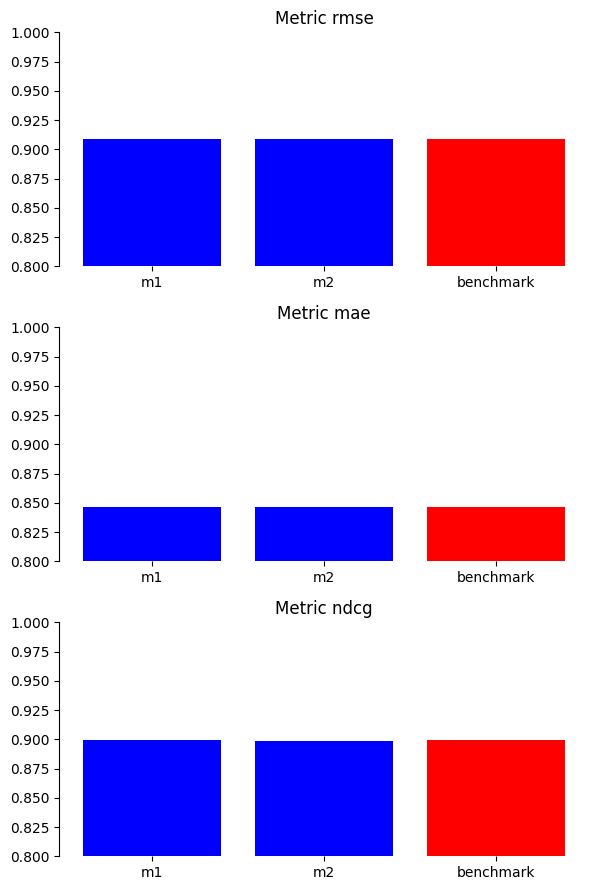

In [23]:
def plot_metrics(evals: dict):
    metrics = list(evals['benchmark'].keys())
    n_metrics = len(metrics)
    fig, ax = plt.subplots(n_metrics, 1, figsize=(6, 3*n_metrics)) 

    for i, metric in enumerate(metrics):
        ax[i].set_title(f'Metric {metric}')
        metric_values = {}
        for model, eval in evals.items():
            metric_values[model] = eval[metric]
        colors = ['b' for _ in range(len(evals))]
        colors[-1] = 'r'
        ax[i].bar(metric_values.keys(), metric_values.values(), color=colors)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)
        ax[i].spines['bottom'].set_visible(False)
        ax[i].set_ylim((0.8, 1.0))
    plt.tight_layout()

plot_metrics(evals)